# Index Fund Performance vs. Inflation: A Real Return Analysis

## Introduction
Inflation has reemerged as a central economic concern in recent years, making real (inflation adjusted) investment returns increasingly important for long term decision-making. Even modest annual inflation compounds over time, meaning investors must consistently generate returns above inflation to preserve purchasing power.

This analysis evaluates the performance of major U.S. equity index funds over the past 25 years to determine whether they have historically outpaced inflation and how consistently they have done so across different economic environments.

### Project Objective

Evaluate whether long-term investment in broad U.S. equity index funds has historically outpaced inflation, preserving real purchasing power across different market periods.

### Business Context

Investors and financial decisionmakers need to evaluate real returns, not just nominal performance, to understand the long term effectiveness of index fund investing during varying inflationary environments.

### Approach

Historical price data for major U.S. equity index funds and CPI inflation data were used to calculate nominal and real returns across multiple periods, enabling comparative analysis of performance and inflation impact.

In [1]:
%%capture
!pip install yfinance

I will be using yahoo finance for this excercise for financial data as well as and pandas, numpy and matplotlib for data cleaning, analysis and visualization.

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This analysis evaluates how the cumulative total returns of selected major index funds compare to U.S. inflation across rolling five-year periods from 2001 through 2025. The five-year windows analyzed are:

- 2001–2005
- 2006–2010
- 2011–2015
- 2016–2020
- 2021–2025

The funds below were selected because they were all in circulation prior to 2001, allowing for consistent historical comparison across the full analysis period.

| Ticker | Asset Class                  | Style / Focus           | Notes |
|--------|-------------------------------|------------------------|-------|
| SPY    | U.S. Large-Cap Equity        | Broad Market Index     | Tracks S&P 500, large-cap U.S. stocks |
| VFINX  | U.S. Large-Cap Equity        | Broad Market Index     | Mutual fund version of S&P 500 |
| DIA    | U.S. Large-Cap Equity        | Blue Chip / Index      | Tracks Dow Jones Industrial Average |
| IWM    | U.S. Small-Cap Equity        | Broad Market Index     | Tracks Russell 2000 small-cap index |
| IVW    | U.S. Large-Cap Equity        | Growth                 | S&P 500 Growth Index ETF |
| IVE    | U.S. Large-Cap Equity        | Value                  | S&P 500 Value Index ETF |
| VGTSX  | International Equity         | Broad Market Index     | Non-U.S. equities globally |
| VBMFX  | U.S. Bonds                   | Broad Bond Market      | Investment-grade bonds, lower volatility |
| VBIAX  | Balanced Fund                | Stocks + Bonds         | 60% stocks, 40% bonds, moderate risk |
| XLV    | U.S. Sector Equity           | Health Care Sector     | Healthcare-focused ETF |
| XLE    | U.S. Sector Equity           | Energy Sector          | Energy-focused ETF |
| MDY    | U.S. Mid-Cap Equity          | Mid-Cap Index          | Tracks S&P MidCap 400 |


Returns will then be evaluated in both nominal and inflation adjusted (real) terms to determine whether each fund preserved purchasing power over each period.

### Consumer Price Index (CPI) Data
To measure inflation over each five year period, we use the average CPI for all urban consumers (CPI-U) from 2000–2025. The data was downloaded from [BLS.gov](https://www.bls.gov/data/). We clean the dataset by removing the header rows and unnecessary index columns.


In [3]:
cpi_df = pd.read_excel("CPI_2000_2025.xlsx", header=11)
cpi_df.head()


C:\Users\hfc22\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,2000,168.8,169.8,171.2,171.3,171.5,172.4,172.8,172.8,173.7,174.0,174.1,174.0,172.2,170.8,173.6
1,2001,175.1,175.8,176.2,176.9,177.7,178.0,177.5,177.5,178.3,177.7,177.4,176.7,177.1,176.6,177.5
2,2002,177.1,177.8,178.8,179.8,179.8,179.9,180.1,180.7,181.0,181.3,181.3,180.9,179.9,178.9,180.9
3,2003,181.7,183.1,184.2,183.8,183.5,183.7,183.9,184.6,185.2,185.0,184.5,184.3,184.0,183.3,184.6
4,2004,185.2,186.2,187.4,188.0,189.1,189.7,189.4,189.5,189.9,190.9,191.0,190.3,188.9,187.6,190.2


Now that we have a look at our data, lets calculate our inflation rates over the four 5-year periods we are interested in using the formula below.
$$
\text{Inflation (\%)} = \frac{\text{CPI}_{\text{end}} - \text{CPI}_{\text{start}}}{\text{CPI}_{\text{start}}} \times 100
$$

In [4]:
#Created function to calculate the inflation % for the time periods we are interested in
def inflation_calc(CPI_S, CPI_E):
    inf_p = (CPI_E-CPI_S)/CPI_S*100
    return(inf_p)

In [5]:
#Created list of tuples with the 5 year periods to making looping through them easy 
periods = [(2001, 2005),(2006, 2010),(2011, 2015),(2016, 2020),(2021, 2025)]
#Empty Dictionary to store our inflation percents
Inflation_percents = {}
#looping through our CPI datafram to determine the inflation rates for our 5 year period using .loc
for start, end in periods:
    temp_perc = inflation_calc(cpi_df.loc[cpi_df["Year"]==start,"Jan"].values[0],cpi_df.loc[cpi_df["Year"]==end,"Dec"].values[0])
    Inflation_percents[(start,end)] = temp_perc
#Looping through our dictionary keys and values and clearly printing our inflation percents over this period
for pkey, value in Inflation_percents.items():
    print(f"Inflation Percent from {pkey[0]} to {pkey[1]} is {value:.2f}%")

Inflation Percent from 2001 to 2005 is 12.39%
Inflation Percent from 2006 to 2010 is 10.53%
Inflation Percent from 2011 to 2015 is 7.40%
Inflation Percent from 2016 to 2020 is 9.94%
Inflation Percent from 2021 to 2025 is 23.88%


### Index Fund Data

Now that we have calculated cumulative inflation for the periods covered in our analysis, we will examine major index funds that have been in existence since at least 2000. This ensures consistency in our historical data and allows for accurate comparison across the full analysis period.


In [6]:
#Step one is to create a list of the stock tickers for the index funds I am looking into.
tickers = ["SPY", "VFINX", "DIA", "IWM", "IVW", "IVE","VGTSX", "VBMFX", "VBIAX", "XLV", "XLE","MDY", "VTI"]
#Now I will loop through my list and create the data set from the time period I am looking for from yahoo finance using ExcelWriter
#and will store each period in its own sheet
with pd.ExcelWriter("IndexFunds_2001_2025.xlsx") as writer:
    for period in periods:
        temp_df = pd.DataFrame(columns = ["Ticker", "Start Price", "End Price", "Return %"])
        for ticker in tickers:
            #yahoo finance excludes the last date for end, so instead of the last day of the end year, we will input the first day of the next year
            #also auto_adjust = true means this data will be accounting for splits and dividends
            data = yf.download(ticker, start = f"{period[0]}-01-01", end = f"{period[1]+1}-01-01", auto_adjust = True,progress = False)
            prices = data["Close"].dropna()
            start_price = prices.iloc[0].item()
            end_price   = prices.iloc[-1].item()
            return_percent = ((end_price-start_price)/start_price)*100
            temp_df.loc[len(temp_df)] = [ticker, start_price, end_price, return_percent]
        #Adding the temporary data frame to our excel sheet
        temp_df = temp_df.set_index("Ticker")
        sheetname = f"{period[0]}-{period[1]}"
        temp_df.to_excel(writer, sheet_name=sheetname)
        print(f"Period {sheetname} written")

Period 2001-2005 written
Period 2006-2010 written
Period 2011-2015 written
Period 2016-2020 written
Period 2021-2025 written


Next we will take a look at a snap shot of the first sheet of our data to assure it was captured correctly.

In [7]:
index_data = "IndexFunds_2001_2025.xlsx"
index_data_df = pd.read_excel(index_data, sheet_name="2001-2005", index_col = 0)

index_data_df
    

,Start Price,End Price,Return %
Ticker,,,
SPY,81.997658,85.951477,4.821869
VFINX,76.575294,80.419556,5.020237
DIA,61.689606,68.494537,11.030921
IWM,33.356113,51.092247,53.172063
IVW,11.973249,11.522903,-3.761268
IVE,35.963749,40.999081,14.001131
VGTSX,6.007059,8.153272,35.728175
VBMFX,3.956764,5.136714,29.821098
VBIAX,7.773898,9.621540,23.767259


### Calculating Real Returns

We can see that the data for the first period (2001–2005) was successfully retrieved. Next, we will adjust the nominal returns for inflation to calculate the real returns for each index fund. Real return is calculated using the following formula:

$$
\text{Real Return} = \frac{1 + \text{Nominal Return}}{1 + \text{Inflation}} - 1
$$

This gives the inflation adjusted return, reflecting the true growth in purchasing power over each period.

In [8]:
def RR(NR_percent,Inf_percent):
    NR = NR_percent / 100    # converting to decimal
    Inf = Inf_percent / 100  # converting to decimal
    real_return = ((1 + NR) / (1 + Inf) - 1) * 100  # back to percent
    return real_return

### Applying the Real Return Function

Next, we will apply our `RR` function to the index fund data stored in the Excel file (`IndexFunds_2001_2025.xlsx`) to calculate the inflation-adjusted returns for each fund across all five-year periods.

In [9]:
#creating our real return data frame wil our tickers as our first column
rr_df = pd.DataFrame({"Tickers":tickers})
#Now we will loop through our periods in than tickers and apply the real return function to the start and ending values for each ticker in each period
for period in periods:
    time = f"{period[0]}-{period[1]}"
    index_data_df = pd.read_excel(index_data, sheet_name=time, index_col=0)
    inflation = Inflation_percents[period]
    temp_RR_list = []
    for ticker in tickers:
        nominal_return = index_data_df.loc[ticker,"Return %"]
        temp_RR = RR(nominal_return,inflation)
        temp_RR_list.append(temp_RR)
    rr_df[time] = temp_RR_list
rr_df    

,Tickers,2001-2005,2006-2010,2011-2015,2016-2020,2021-2025
0,SPY,-6.736234,-0.490186,65.525094,86.323171,59.897396
1,VFINX,-6.559738,-0.681275,65.133850,86.168253,59.549875
2,DIA,-1.211818,9.745753,56.423444,81.625109,40.174483
3,IWM,36.282664,10.660460,42.045428,73.534961,9.199510
4,IVW,-14.372957,5.397363,76.543493,118.684114,63.692450
5,IVE,1.430885,-7.388367,53.321247,50.485428,49.172794
6,VGTSX,20.762212,9.322838,-1.530825,42.753254,17.506356
7,VBMFX,15.506475,19.896065,10.129902,12.763431,-21.330314
8,VBIAX,10.120158,12.102092,40.428732,58.356735,33.664589
9,XLV,13.089925,-2.924031,130.082324,59.075641,19.830510


Now that we have our Real Return Rates calculated, we will create a data frame for our Nominal Return Rates to make them easy to compare.

In [10]:
nr_df = pd.DataFrame({"Tickers":tickers})
for period in periods:
    time = f"{period[0]}-{period[1]}"
    index_data_df = pd.read_excel(index_data, sheet_name=time, index_col=0)
    temp_NR_list = []
    for ticker in tickers:
        temp_NR = index_data_df.loc[ticker,"Return %"]
        temp_NR_list.append(temp_NR)
    nr_df[time] = temp_NR_list
nr_df

,Tickers,2001-2005,2006-2010,2011-2015,2016-2020,2021-2025
0,SPY,4.821869,9.987199,77.778083,104.850418,98.084695
1,VFINX,5.020237,9.775990,77.357877,104.680096,97.654179
2,DIA,11.030921,21.300879,68.002684,99.685199,73.651482
3,IWM,53.172063,22.311896,52.560336,90.790599,35.278949
4,IVW,-3.761268,16.494647,89.612119,140.429206,102.786098
5,IVE,14.001131,2.362709,64.670847,65.449110,84.798804
6,VGTSX,35.728175,20.833436,5.758352,56.948079,45.569667
7,VBMFX,29.821098,32.519918,18.282264,23.976186,-2.542123
8,VBIAX,23.767259,23.905318,50.823964,74.103109,65.586870
9,XLV,27.105067,7.297095,147.114161,74.893500,48.448884


Now that we have our Nominal Return Rates, lets combine our tables so we can view them side, by side.

In [11]:
nr_df_temp = nr_df.set_index("Tickers")
rr_df_temp = rr_df.set_index("Tickers")

combined_df = pd.DataFrame(index=tickers)

for period in periods:
    name = f"{period[0]}-{period[1]}"
    combined_df[f"Nominal-{name}"] = nr_df_temp[name]
    combined_df[f"Real-{name}"] = rr_df_temp[name]

combined_df

,Nominal-2001-2005,Real-2001-2005,Nominal-2006-2010,Real-2006-2010,Nominal-2011-2015,Real-2011-2015,Nominal-2016-2020,Real-2016-2020,Nominal-2021-2025,Real-2021-2025
SPY,4.821869,-6.736234,9.987199,-0.490186,77.778083,65.525094,104.850418,86.323171,98.084695,59.897396
VFINX,5.020237,-6.559738,9.775990,-0.681275,77.357877,65.133850,104.680096,86.168253,97.654179,59.549875
DIA,11.030921,-1.211818,21.300879,9.745753,68.002684,56.423444,99.685199,81.625109,73.651482,40.174483
IWM,53.172063,36.282664,22.311896,10.660460,52.560336,42.045428,90.790599,73.534961,35.278949,9.199510
IVW,-3.761268,-14.372957,16.494647,5.397363,89.612119,76.543493,140.429206,118.684114,102.786098,63.692450
IVE,14.001131,1.430885,2.362709,-7.388367,64.670847,53.321247,65.449110,50.485428,84.798804,49.172794
VGTSX,35.728175,20.762212,20.833436,9.322838,5.758352,-1.530825,56.948079,42.753254,45.569667,17.506356
VBMFX,29.821098,15.506475,32.519918,19.896065,18.282264,10.129902,23.976186,12.763431,-2.542123,-21.330314
VBIAX,23.767259,10.120158,23.905318,12.102092,50.823964,40.428732,74.103109,58.356735,65.586870,33.664589
XLV,27.105067,13.089925,7.297095,-2.924031,147.114161,130.082324,74.893500,59.075641,48.448884,19.830510


Now that we have our table with a both our nominal and real return %'s, lets create some side by side bar graphs to visualize the difference in nominal vs real return.

In [12]:
#Dictionary to store our graphs so we can view them one at a time
figures = {}
#Looping through the periods to create a graph for each time period
for period in periods:
    name = f"{period[0]}-{period[1]}"
    nominal_col = f"Nominal-{name}"
    real_col = f"Real-{name}"
    
    tickers = combined_df.index.tolist()
    nominal = combined_df[nominal_col].values
    real = combined_df[real_col].values

    x = np.arange(len(tickers))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12,6))
    ax.bar(x - width/2, nominal, width, label="Nominal")
    ax.bar(x + width/2, real, width, label="Real")

    ax.set_ylabel("Return %")
    ax.set_title(f'Nominal vs Real Returns: {name}')
    ax.set_xticks(x)
    ax.set_xticklabels(tickers, rotation=45, ha="right")
    ax.legend()
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    #keeping our y axis consistent to make visual comparision between periods easier
    ax.set_ylim(-30,150)
    
    plt.tight_layout()
    figures[name] = fig 
    plt.close()

Now that we have our comparison charts for nominal vs real returns, let’s take a quick look at each period to visualize inflation drag and determine our conclusions and recommendations.

### Visualization of Inflation Drag

#### 2001-2005 Nominal vs Real Return Comparison
##### Post-Dot-Com Recovery

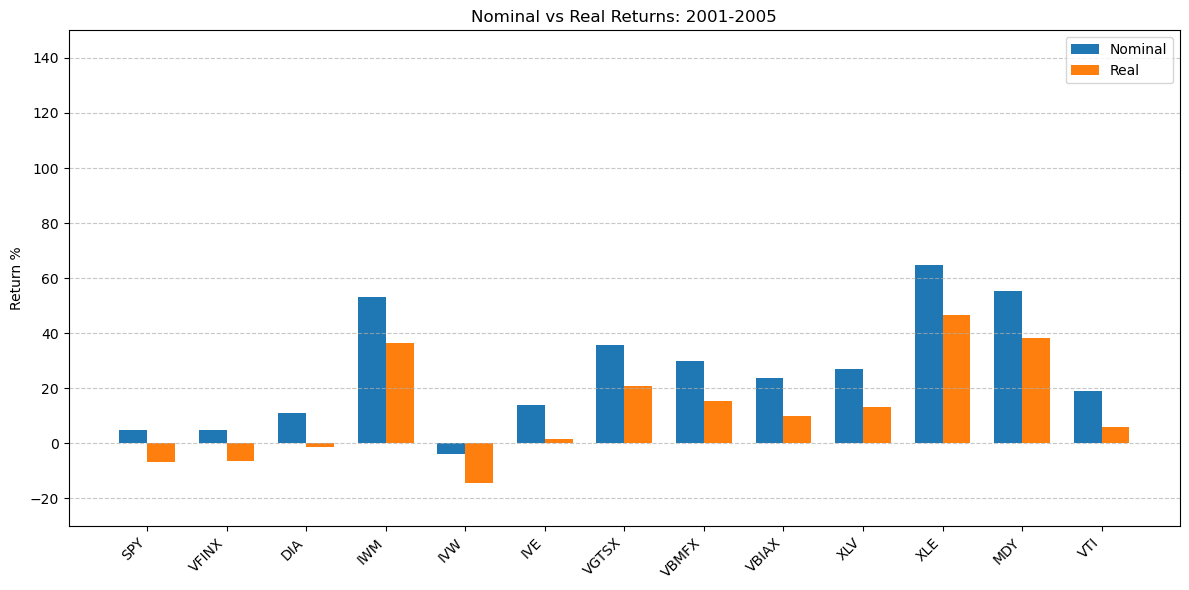

In [13]:
figures["2001-2005"]

**Observation**: Nominal returns were positive for most funds, with over 75% achieving nominal returns above 10%, however, four funds failed to outperform inflation despite this apparent strength.

**Interpretation**: This period experienced the second-highest cumulative inflation in the sample, which materially reduced real returns and created a wide gap between nominal and inflation adjusted performance.

**Decision Impact**: Strong long term nominal market performance does not guarantee real purchasing power growth when cumulative inflation is elevated.


#### 2006-2010 Nominal vs Real Return Comparison
##### Mid-2000s Expansion

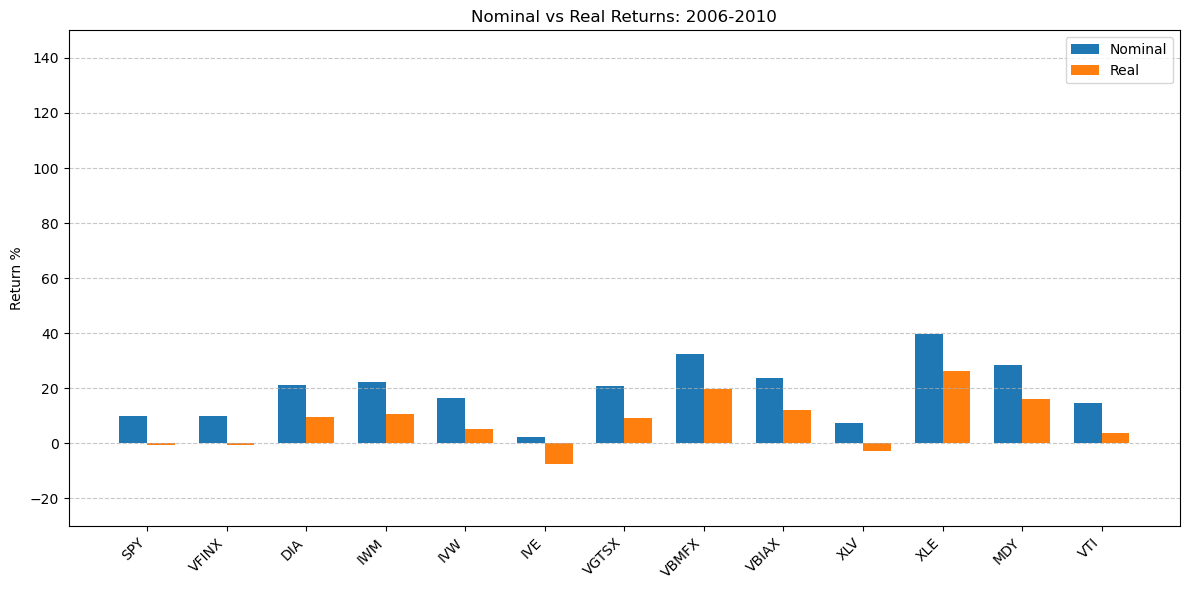

In [14]:
figures["2006-2010"]

**Observation**: Nominal returns were positive and more consistent across funds, however, four funds still failed to outperform inflation. Nominal returns were lower than in the previous period, with no fund reaching a 40% return. The lower cumulative inflation rate narrowed the gap between nominal and real returns.

**Interpretation**: Even with more consistency between funds and a lower inflation rate, real returns were still eroded by inflation during this period.

**Decision Impact**: Even in stable and positive market environments, inflation can still meaningfully reduce real returns.

#### 2011-2015 Nominal vs Real Return Comparison
##### Financial Crisis & Recovery



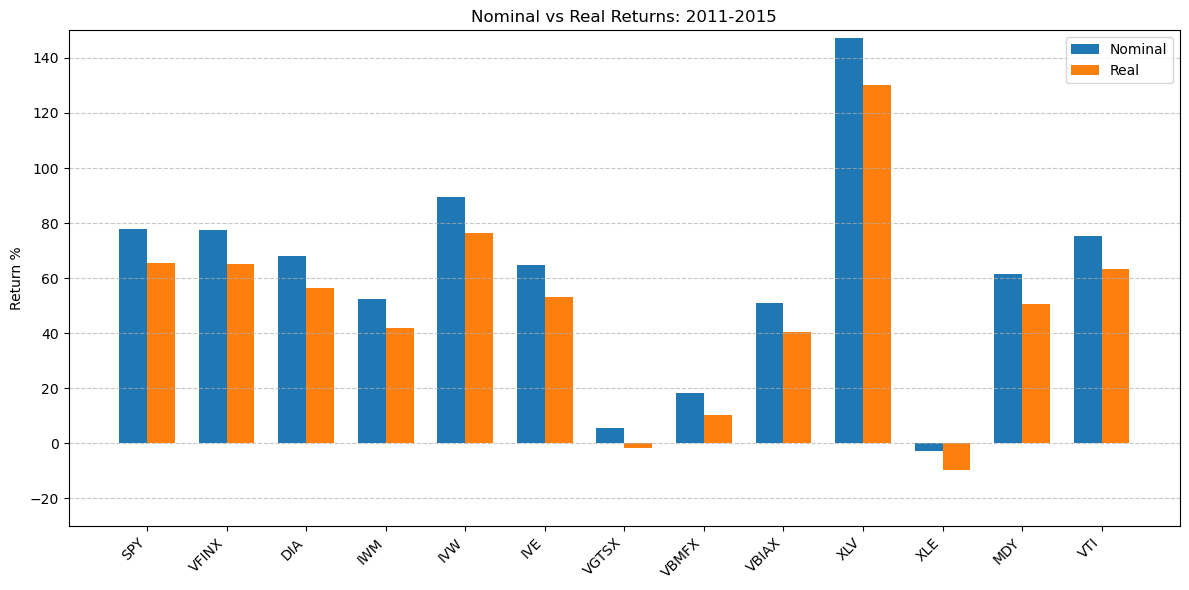

In [15]:
figures["2011-2015"]

**Observation**: Returns in this period are the highest we've observed so far signaling a strong market recovery post-2008. The gap between nominal and real returns is much narrower than previous periods driven by the smallest cumulative inflation rate in our sample. Only two of the funds failed to outperform inflation.

**Interpretation**: Strong market performance combined with low inflation allowed nominal gains to translate more directly into real returns, though inflation erosion was not entirely eliminated.

**Decision Impact**: Low inflation allows strong market recoveries to translate more directly into real returns.

#### 2016-2020 Nominal vs Real Return Comparison
##### Post-Crisis Low-Inflation Period


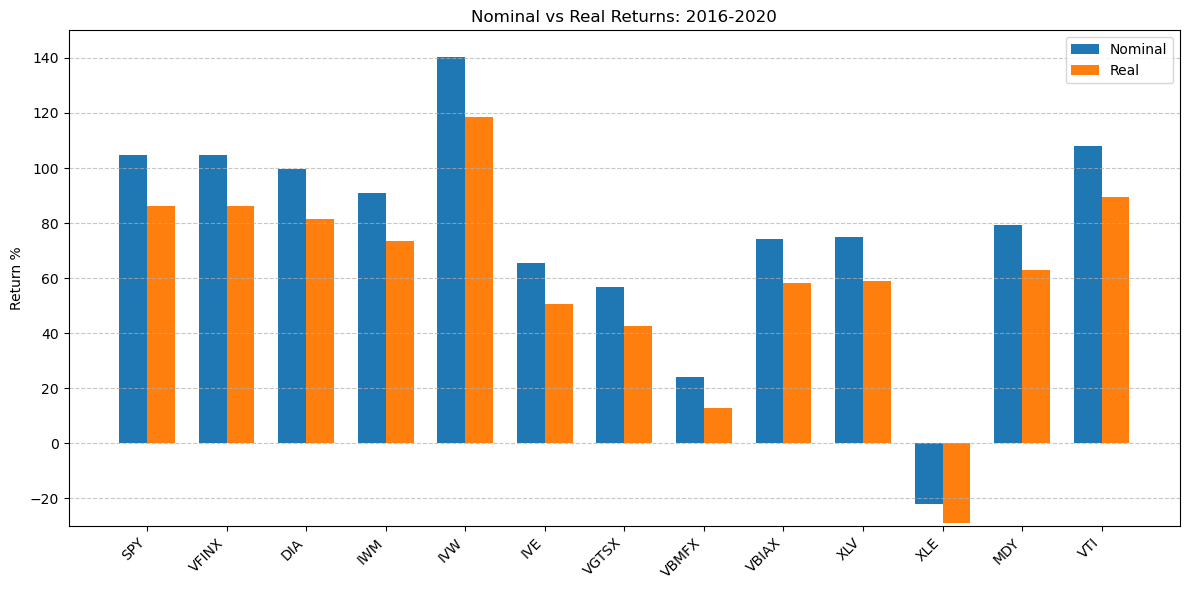

In [16]:
figures["2016-2020"]

**Observation**: Performance remained consistently strong across all but one fund, with XLE standing out as the primary outlier. The gap between nominal and real returns was relatively narrow during this period.

**Interpretation**: Even in periods of strong market performance, sector specific underperformance can occur, highlighting variation within otherwise favorable conditions.

**Decision Impact**: Consistent market growth does not eliminate the need for diversification, as individual sectors may underperform despite favorable conditions.

#### 2021-2025 Nominal vs Real Return Comparison
##### Recent High-Inflation Period

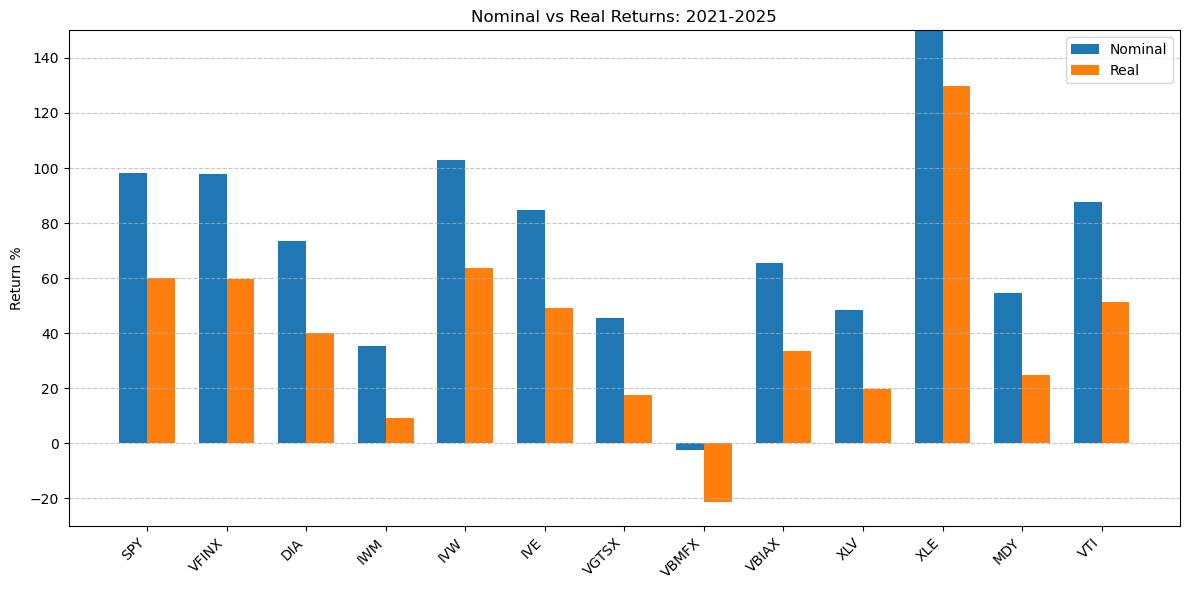

In [17]:
figures["2021-2025"]

**Observation**: Overall performance remained strong during this period, but variation across funds increased in comparison to previous periods. XLE again stood out as an outlier, this time positively, while VBMFX was the only fund that failed to outperform inflation. This period also exhibited the largest gap between nominal and real returns.

**Interpretation**: Elevated inflation increased volatility, demonstrating that traditionally safe investments, such as bonds, can experience meaningful performance erosion under extreme inflationary conditions.

**Decision Impact**: All investments carry risk, and changing inflationary conditions reinforce the need for ongoing portfolio evaluation.

## Summary of Analysis

This analysis evaluated whether long term investment in broad U.S. equity index funds has historically outpaced inflation and preserved real purchasing power across different market environments.

Across all periods, nominal returns were generally positive, however, real returns varied depending on inflation levels. Periods with higher cumulative inflation consistently reduced real returns, even when market performance appeared relatively strong on a nominal basis.

Low-inflation periods allowed nominal gains to translate more directly into real purchasing power growth. That said, performance was not completely consistent across all funds, and sector-specific and asset-class differences remained present even in favorable conditions.

Overall, these results show that inflation is a critical factor in long-term investment outcomes and that nominal returns alone can be misleading. Evaluating investment performance in real terms and across different economic environments is essential for making informed investment decisions.